In [41]:
import networkx as nx
from networkx.algorithms.bipartite import sets
from numpy import *
from networkx.algorithms import bipartite
import itertools
import random
import matplotlib.pyplot as plt

In [42]:
# Граф Эрдьёша-Реньи

def random_graph(n:int, p:double, rnd=None) -> nx.Graph:
  gr = nx.Graph()
  N_range = range(n)
  gr.add_nodes_from(N_range)
   
  for pair in itertools.permutations(N_range, 2):
    if random.random()  < p:
      gr.add_edge(*pair)
   
  return gr

In [43]:
#Генерация сочетаний из n по k без повторений

def comb(n, k):   
    d = list(range(0, k))
    yield d

    while True:
        i = k - 1
        while i >= 0 and d[i] + k - i + 1 > n:
            i -= 1
        if i < 0:
            return

        d[i] += 1
        for j in range(i + 1, k):
            d[j] = d[j - 1] + 1

        yield d

In [44]:
def is_bipartite_node_set(G, nodes):
    """Returns True if nodes and G/nodes are a bipartition of G.

    Parameters
    ----------
    G : NetworkX graph

    nodes: list or container
      Check if nodes are a one of a bipartite set.

    Notes
    -----
    For connected graphs the bipartite sets are unique.  This function handles
    disconnected graphs.
    """
    S = set(nodes)
    for CC in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        X, Y = sets(CC)
        if not ((X.issubset(S) and Y.isdisjoint(S)) or
                (Y.issubset(S) and X.isdisjoint(S))):
            return False
    return True

In [45]:
def color(G):
    """Returns a two-coloring of the graph.

    Raises an exception if the graph is not bipartite.

    Parameters
    ----------
    G : NetworkX graph

    Returns
    -------
    color : dictionary
       A dictionary keyed by node with a 1 or 0 as data for each node color.

    Raises
    ------
    exc:`NetworkXError` if the graph is not two-colorable.
    """
    if G.is_directed():
        import itertools

        def neighbors(v):
            return itertools.chain.from_iterable([G.predecessors(v),
                                                  G.successors(v)])
    else:
        neighbors = G.neighbors

    color = {}
    for n in G:  # handle disconnected graphs
        if n in color or len(G[n]) == 0:  # skip isolates
            continue
        queue = [n]
        color[n] = 1  # nodes seen with color (1 or 0)
        while queue:
            v = queue.pop()
            c = 1 - color[v]  # opposite color of node v
            for w in neighbors(v):
                if w in color:
                    if color[w] == color[v]:
                        raise nx.NetworkXError("Graph is not bipartite.")
                else:
                    color[w] = c
                    queue.append(w)
    # color isolates with 0
    color.update(dict.fromkeys(nx.isolates(G), 0))
    return color

In [46]:
def is_bipartite(G):
    """ Returns True if graph G is bipartite, False if not.

    Parameters
    ----------
    G : NetworkX graph

    See Also
    --------
    color, is_bipartite_node_set
    """
    try:
        color(G)
        return True
    except nx.NetworkXError:
        return False


In [47]:
def min_weighted_vertex_cover(G, weight=None):
    cost = dict(G.nodes(data=weight, default=1))
    # While there are uncovered edges, choose an uncovered and update
    # the cost of the remaining edges.
    for u, v in G.edges():
        min_cost = min(cost[u], cost[v])
        cost[u] -= min_cost
        cost[v] -= min_cost
    return {u for u, c in cost.items() if c == 0}

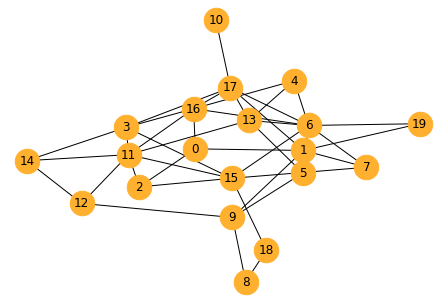

In [48]:
# Строим рандомный граф
# n - количество вершин    
n = 20

graph = random_graph(n, 0.1)
nx.draw(graph,
         node_color='#ffb02e',
         node_size=600,
         with_labels=True)   


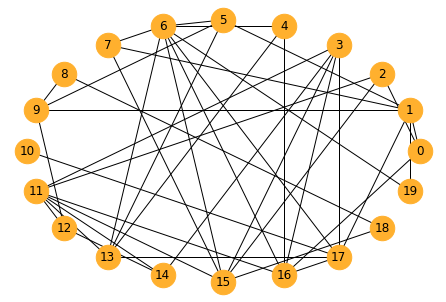

In [49]:
nx.draw_circular(graph,
         node_color='#ffb02e',
         node_size=600,
         with_labels=True)   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Bipartite: False
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Biparti

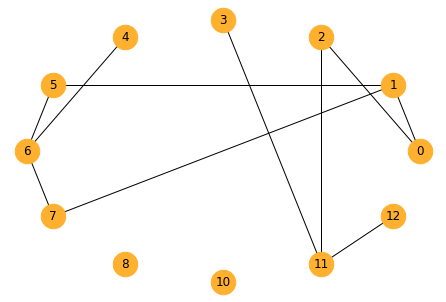

In [50]:
sub = graph

while not nx.is_bipartite(sub):
    for c in comb(n, n-1):
        sub = graph.subgraph(c)
        print(list(sub))
        print("Bipartite:", nx.is_bipartite(sub))
        if nx.is_bipartite(sub):
            print("Найден двудольный граф")
            nx.draw_circular(sub,
                node_color="#ffb02e",
                node_size=600,
                with_labels=True) 
            break         
    n -= 1   
    

{8, 10}

{0, 4, 5, 7, 11} {1, 2, 3, 6, 12}


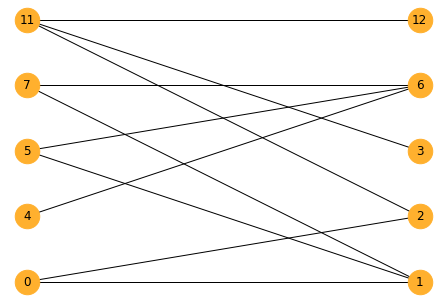

In [51]:
isolated_nodes = set(sub.nodes())
for (u, v) in sub.edges():
  isolated_nodes -= {u}
  isolated_nodes -= {v}
  
if isolated_nodes:    
    print(isolated_nodes)
    iso = isolated_nodes
else:
    print("Нет изолированных вершин")
    iso = 0

frozen_graph  = nx.freeze(sub)    
unfrozen_graph = nx.Graph(frozen_graph)

unfrozen_graph.remove_nodes_from(list(isolated_nodes)) 
print(unfrozen_graph)

X, Y = bipartite.sets(unfrozen_graph)
print(X, Y)
pos = dict()
pos.update( (n, (1, i)) for i in enumerate(X) )
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(unfrozen_graph, 
        pos=pos,
        node_color="#ffb02e",
        node_size=600,
        with_labels=True)


In [52]:
if len(X) > len(Y): 
    print("Максимальное независимое множество = ", len(X))
    maxn = len(X)
else:
    print("Максимальное независимое множество = ", len(Y))
    maxn = len(Y)

Максимальное независимое множество =  5


In [56]:
print("Дополнение минимального вершинного покрытия является максимальным независимым множеством.")
minv = len(unfrozen_graph) - maxn
print("Наименьшее вершинное покрытие = ", minv)


Дополнение минимального вершинного покрытия является максимальным независимым множеством.
10
Наименьшее вершинное покрытие =  5


In [54]:
print(min_weighted_vertex_cover(sub, weight=None))



{0, 1, 2, 4, 6, 11}
